<a href="https://colab.research.google.com/github/muhammadali122/Human-Emotion-Detection/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
train_path = '/content/drive/MyDrive/FYP Project/dataset/train'
val_path = '/content/drive/MyDrive/FYP Project/dataset/test'
test_path = '/content/drive/MyDrive/FYP Project/dataset/test'

In [3]:
# re-size all the images to a size VGG-16 expects.
IMAGE_SIZE = [224, 224]

# Set the batch size
BATCH_SIZE = 16 
NUM_EPOCHS = 5
LEARNING_RATE = 0.0001
NUM_CLASSES = 3 

In [4]:
import os
CLASSES = os.listdir(train_path)
NUM_CLASSES = len(CLASSES)

In [5]:
print("Class --> {} \n and the length is : {}".format(CLASSES, NUM_CLASSES))

Class --> ['NEGATIVE', 'NEUTRAL', 'POSITIVE'] 
 and the length is : 3


In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [7]:
# Import the images from the train dataset.
# Make sure to provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 1599 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
# Import the images from the test dataset.

test_set = train_datagen.flow_from_directory(
    directory = test_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)


Found 533 images belonging to 3 classes.


In [10]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 2s 0us/step


In [11]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [12]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [13]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# fit the model

# history = model.fit_generator(
#   training_set,
#   validation_data=test_set,
#   epochs=5,
#   steps_per_epoch=len(training_set),
#   validation_steps=len(test_set)
# )

history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
100/100 [==============================] - 1434s 14s/step - loss: 0.5605 - accuracy: 0.7642 - val_loss: 0.4554 - val_accuracy: 0.8049
Epoch 2/20
100/100 [==============================] - 35s 349ms/step - loss: 0.3720 - accuracy: 0.8499 - val_loss: 0.4811 - val_accuracy: 0.8236
Epoch 3/20
100/100 [==============================] - 35s 349ms/step - loss: 0.3768 - accuracy: 0.8493 - val_loss: 0.3314 - val_accuracy: 0.8593
Epoch 4/20
100/100 [==============================] - 36s 356ms/step - loss: 0.3155 - accuracy: 0.8718 - val_loss: 0.3246 - val_accuracy: 0.8537
Epoch 5/20
100/100 [==============================] - 35s 355ms/step - loss: 0.2962 - accuracy: 0.8724 - val_loss: 0.3302 - val_accuracy: 0.8593
Epoch 6/20
100/100 [==============================] - 35s 351ms/step - loss: 0.3074 - accuracy: 0.8755 - val_loss: 0.3713 - val_accuracy: 0.8405
Epoch 7/20
100/100 [==============================] - 35s 349ms/step - loss: 0.2875 - accuracy: 0.8793 - val_loss: 0.3785 - val_ac

In [27]:
# Generate Validation set.
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_set = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 533 images belonging to 3 classes.


In [28]:
validation_steps = len(test_set)

loss0,accuracy0 = model.evaluate(validation_set, steps = validation_steps)

print("loss: {:.2f}".format(loss0))
print("accuracy: {:.2f}".format(accuracy0))

34/34 [==============================] - 4s 109ms/step - loss: 0.3220 - accuracy: 0.8762
loss: 0.32
accuracy: 0.88


In [29]:
# Generate Validation set.
validation_set1 = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    shuffle=False, 
    seed=42, 
    class_mode="binary"
)

# validation_set2.reset()

Found 533 images belonging to 3 classes.


In [30]:
# just capture the loss and accuray into val variable... unlike in pervious code to capture into loss0 and accuracy0. Just to showcase alternate way.

val = model.evaluate(validation_set, steps = validation_steps)

print("loss: {:.2f}".format(val[0]))
print("accuracy: {:.2f}".format(val[1]))

34/34 [==============================] - 4s 110ms/step - loss: 0.3220 - accuracy: 0.8762
loss: 0.32
accuracy: 0.88


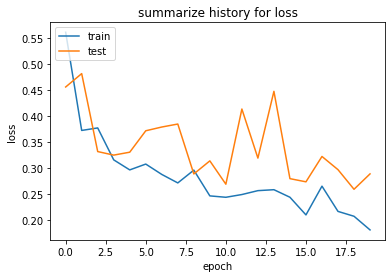

In [31]:
# summarize history for loss

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation (Test) loss')
plt.title('summarize history for loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

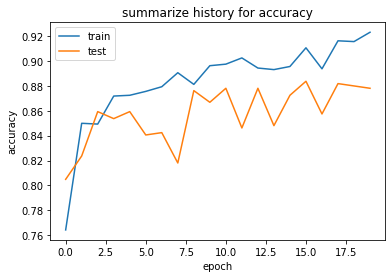

In [32]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('summarize history for accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

150528
[2]


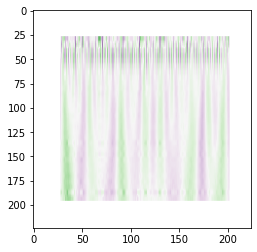

In [33]:
from keras.preprocessing import image
dir = '/content/drive/MyDrive/FYP Project/dataset/train/POSITIVE/image_1427.png'
img = image.load_img(dir,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
print(img.size)
output = model.predict(img)
output = np.argmax(output,axis=1)
print (output)